In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Train-Test Split

In [ ]:
#train_test_split

In [180]:
df = pd.read_csv('dataset.csv')

In [181]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [182]:
X = df.drop(['ID', 'Sales'], axis=1)
y = df['Sales']

In [183]:
X.shape

(200, 3)

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
?train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
print(f"Shape of the train set: {X_train.shape}")
print(f"Shape of the test set: {X_test.shape}")

Shape of the train set: (160, 3)
Shape of the test set: (40, 3)


<ipython-input-190-88bb841247cb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['Radio'])


<Axes: xlabel='Radio', ylabel='Density'>

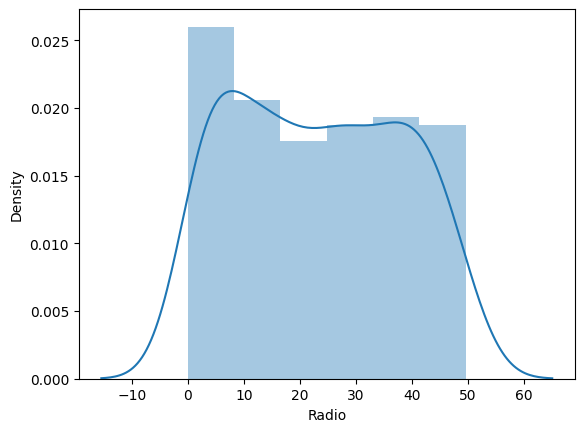

In [190]:
sns.distplot(X['Radio'])

In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()

In [193]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<ipython-input-198-c8c19f29885f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[:, 1])


<Axes: ylabel='Density'>

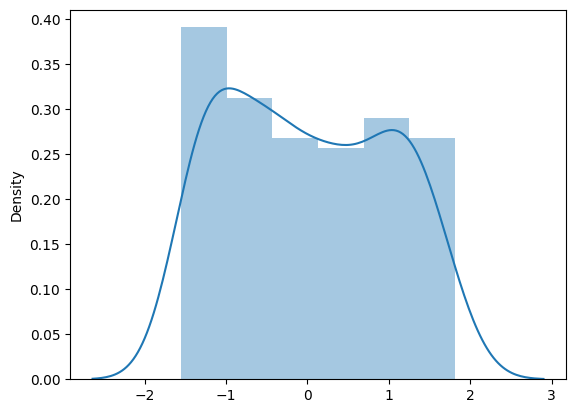

In [198]:
sns.distplot(X_train[:, 1])

In [199]:
from sklearn.linear_model import Ridge

In [220]:
model = Ridge(alpha=0.00001)

In [221]:
model.fit(X_train, y_train)

Ridge(alpha=1e-05)

In [222]:
y_pred = model.predict(X_test)

In [223]:
from sklearn.metrics import mean_squared_error

In [224]:
mean_squared_error(y_test, y_pred)

3.588163643418381

### Train-Validation-Test

In [227]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size = 0.3)

In [228]:
print(f"Shape of the train set: {X_train.shape}")
print(f"Shape of the test set: {X_other.shape}")

Shape of the train set: (140, 3)
Shape of the test set: (60, 3)


In [229]:
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5)

In [230]:
print(f"Shape of the train set: {X_test.shape}")
print(f"Shape of the test set: {X_val.shape}")

Shape of the train set: (30, 3)
Shape of the test set: (30, 3)


In [231]:
scaler = StandardScaler()

In [232]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [242]:
model = Ridge(alpha = 0.1)

In [243]:
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [244]:
y_pred = model.predict(X_val)

In [245]:
mean_squared_error(y_val, y_pred)

3.0049095573750924

In [246]:
y_pred_test = model.predict(X_test)

In [247]:
print(f"Final Error = {mean_squared_error(y_test, y_pred_test)}")

Final Error = 3.2768897441893756


### Cross Validation Score

In [ ]:
#cross_val_score

In [248]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [249]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [251]:
X_train, X_test, y_train, ytest = train_test_split(X, y, test_size=0.2)

In [252]:
scaler = StandardScaler()

In [253]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [265]:
model = Ridge(alpha = 0.1)

In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=7)

In [268]:
abs(scores.mean())

2.6760935802308063

In [270]:
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [271]:
y_pred = model.predict(X_test)

In [274]:
y_pred.shape

(40,)

In [275]:
y_test.shape

(30,)

In [276]:
mean_squared_error(ytest, y_pred)

4.4672881986129465

### Cross Validate

In [ ]:
#cross_validate

In [277]:
from sklearn.model_selection import cross_validate

In [278]:
model = Ridge(alpha = 0.1)

In [279]:
scores = cross_validate(model, X_train, y_train, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], cv=7)

In [280]:
scores

{'fit_time': array([0.01119995, 0.00188017, 0.00691819, 0.00154567, 0.0018034 ,
        0.00140095, 0.00180078]),
 'score_time': array([0.00180602, 0.00111461, 0.00114751, 0.00838494, 0.00108504,
        0.01185608, 0.00767374]),
 'test_neg_mean_absolute_error': array([-1.39048737, -1.30914227, -1.1430967 , -1.3205978 , -1.25106071,
        -1.14407236, -1.33018936]),
 'test_neg_mean_squared_error': array([-3.15280271, -2.38007355, -1.81488621, -3.29278251, -2.8082877 ,
        -2.52508337, -2.75873901])}

In [284]:
pd.DataFrame(scores).sum()

fit_time                         0.026549
score_time                       0.033068
test_neg_mean_absolute_error    -8.888647
test_neg_mean_squared_error    -18.732655
dtype: float64

### Grid Search

In [ ]:
#ElasticNet | GridSearchCV

In [285]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [286]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [288]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [289]:
from sklearn.linear_model import ElasticNet

In [290]:
model = ElasticNet()

In [292]:
from sklearn.model_selection import GridSearchCV

In [291]:
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 5, 10, 100],
              'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.7, 0.99]}

In [293]:
?GridSearchCV

In [294]:
grid_model = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

In [295]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 5, 10, 100],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.7, 0.99]},
             scoring='neg_mean_squared_error')

In [296]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.99)

In [297]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002269,0.000790,0.000938,0.000157,0.1,0.01,"{'alpha': 0.1, 'l1_ratio': 0.01}",-4.387883,-2.047613,-2.490734,-2.500121,-5.749078,-3.435086,1.410916,8
1,0.001752,0.000205,0.000862,0.000048,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-4.337391,-2.037391,-2.474282,-2.495738,-5.686332,-3.406227,1.388320,6
2,0.002197,0.000344,0.000918,0.000059,0.1,0.2,"{'alpha': 0.1, 'l1_ratio': 0.2}",-4.282563,-2.028179,-2.457526,-2.492631,-5.616920,-3.375564,1.362654,5
3,0.001552,0.000129,0.000792,0.000057,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-4.127610,-2.012682,-2.410417,-2.495939,-5.411136,-3.291557,1.283475,4
4,0.001324,0.000021,0.000680,0.000024,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-4.033993,-2.010681,-2.384647,-2.515405,-5.279006,-3.244746,1.229288,2
5,0.004004,0.003008,0.000850,0.000139,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.916091,-2.024105,-2.359948,-2.558701,-5.099322,-3.191633,1.150612,1
6,0.003210,0.003201,0.002295,0.002975,0.2,0.01,"{'alpha': 0.2, 'l1_ratio': 0.01}",-5.129110,-2.368406,-2.880310,-2.724005,-6.631638,-3.946694,1.657116,13
7,0.001900,0.000277,0.000865,0.000074,0.2,0.1,"{'alpha': 0.2, 'l1_ratio': 0.1}",-5.005853,-2.315650,-2.824746,-2.688065,-6.531814,-3.873226,1.629779,12
8,0.002245,0.000572,0.000880,0.000030,0.2,0.2,"{'alpha': 0.2, 'l1_ratio': 0.2}",-4.869812,-2.261023,-2.765721,-2.651229,-6.417638,-3.793084,1.597132,11
9,0.001687,0.000027,0.000828,0.000023,0.2,0.5,"{'alpha': 0.2, 'l1_ratio': 0.5}",-4.472943,-2.129733,-2.605925,-2.566341,-6.004385,-3.555865,1.466402,9


In [298]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.99}

In [299]:
y_pred = grid_model.predict(X_test)

In [300]:
mean_squared_error(y_test, y_pred)

2.278007497174451

### Housing Data Project

In [301]:
df = pd.read_csv('AMES_Final_DF.csv')

In [302]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [306]:
df['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2920    142500
2921    131000
2922    132000
2923    170000
2924    188000
Name: SalePrice, Length: 2925, dtype: int64

In [307]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [309]:
X.shape

(2925, 273)

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [311]:
scaler = StandardScaler()

In [312]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [313]:
model = ElasticNet()

In [314]:
param_grid = {'alpha':[0.1, 0.5, 1, 10, 25, 70, 100],
              'l1_ratio':[0.01, 0.1, 0.3, 0.6, 0.9, 0.99]}

In [315]:
grid_model = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

In [316]:
grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+11, tolerance: 1.334e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+11, tolerance: 1.299e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.681e+11, tolerance: 1.423e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 10, 25, 70, 100],
                         'l1_ratio': [0.01, 0.1, 0.3, 0.6, 0.9, 0.99]},
             scoring='neg_mean_squared_error')

In [317]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.99)

In [318]:
y_pred = grid_model.predict(X_test)

In [323]:
np.sqrt(mean_squared_error(y_test, y_pred))

21525.88235031047

In [321]:
y_test.mean()

189858.41296928326